In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
# ваш код
print("Самый холодный год:", df.groupby(df.Day.dt.year).mean().idxmin().values[0])
print("Самый теплый год:  ", df.groupby(df.Day.dt.year).mean().idxmax().values[0])

Самый холодный год: 2012
Самый теплый год:   2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
# ваш код
df[(df.Day.dt.month == 1) & (df.t >= 0)].groupby(df.Day.dt.year).count()['Day'].idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
# ваш код
df[(df.Day.dt.month >= 6) & (df.Day.dt.month <= 8)].groupby(df.Day.dt.year).mean().idxmin().values[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [27]:
# ваш код
df['diff'] = df['t'].shift(-1) - df['t']
df[df['diff'] == df['diff'].max()]

,Day,t,diff
1818,2012-12-26,-11,14.0


In [28]:
df = df.drop(columns='diff')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

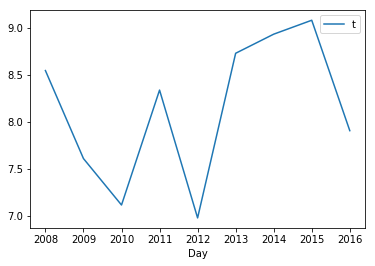

In [29]:
# ваш код
%matplotlib inline
df.groupby(df.Day.dt.year).mean().plot()